# Backtesting

In time series forecasting, the process of *backtesting* consists of evaluating the performance of a predictive model by applying it retrospectively to historical data. Therefore, it is a special type of cross-validation applied to the previous period(s).

The purpose of backtesting is to evaluate the accuracy and effectiveness of a model and identify any potential issues or areas of improvement. By testing the model on historical data, one can assess how well it performs on data that it has not seen before. This is an important step in the modeling process, as it helps to ensure that the model is robust and reliable.

Backtesting can be done using a variety of techniques, such as simple train-test splits or more sophisticated methods like rolling windows or expanding windows. The choice of method depends on the specific needs of the analysis and the characteristics of the time series data.

Overall, backtesting is an essential step in the development of a time series forecasting model. By rigorously testing the model on historical data, one can improve its accuracy and ensure that it is effective at predicting future values of the time series.

## Backtesting without refit

Backtesting without refit is a strategy where the model is trained only once and used sequentially without updating it, following the temporal order of the data. This approach is advantageous as it is much faster than other methods that require retraining the model each time. However, the model may lose its predictive power over time as it does not incorporate the latest information available.

<p style="text-align: center">
<img src="../img/diagram-backtesting-no-refit.png" style="width: 500px;">
</p>

<p style="text-align: center">
<img src="../img/backtesting_no_refit.gif" style="width: 650px;">
<br>
<font size="2.5"> <i>Backtesting without refit.</i></font>
</p>

*Note: The argument needed to achieve this configuration is `refit=False`.*

## Backtesting with refit and increasing training size

In this strategy, the model is trained before making predictions each time, and all available data up to that point is used in the training process. This differs from standard cross-validation, where the data is randomly distributed between training and validation sets.

Instead of randomizing the data, this backtesting sequentially increases the size of the training set while maintaining the temporal order of the data. By doing this, the model can be tested on progressively larger amounts of historical data, providing a more accurate assessment of its predictive capabilities.

<p style="text-align: center">
<img src="../img/diagram-backtesting-refit.png" style="width: 500px;">
</p>

<p style="text-align: center">
<img src="../img/backtesting_refit.gif" style="width: 650px;">
<br>
<font size="2.5"> <i>Backtesting with refit and increasing training size (fixed origin).</i></font>
</p>

*Note: The arguments needed to achieve this configuration are `refit=True` and `fixed_train_size=False`.*

## Backtesting with refit and fixed training size

In this approach, the model is trained using a fixed window of past observations, and the testing is performed on a rolling basis, where the training window is moved forward in time. The size of the training window is kept constant, allowing for the model to be tested on different sections of the data. This technique is particularly useful when there is a limited amount of data available, or when the data is non-stationary, and the model's performance may vary over time. Is also known as time series cross-validation or walk-forward validation.

<p style="text-align: center">
<img src="../img/diagram-backtesting-refit-fixed-train-size.png" style="width: 500px;">
</p>

<p style="text-align: center">
<img src="../img/backtesting_refit_fixed_train_size.gif" style="width: 650px;">
<br>
<font size="2.5"> <i>Backtesting with refit and fixed training size (rolling origin).</i></font>
</p>

*Note: The arguments needed to achieve this configuration are `refit=True` and `fixed_train_size=True`.*

## Backtesting with intermittent refit

The model is retrained every $n$ iterations of prediction. This method is often used when the frequency of retraining and prediction is different. It can be implemented using either a fixed or rolling origin, providing flexibility in adapting the model to new data.

<div class="admonition note" name="html-admonition" style="background: rgba(0,191,191,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00bfa5; border-color: #00bfa5; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00bfa5;"></i>
    <b style="color: #00bfa5;">&#128161 Tip</b>
</p>

This strategy usually achieves a good balance between the computational cost of retraining and avoiding model degradation.

</div>

<p style="text-align: center">
<img src="../img/backtesting_intermittent_refit.gif" style="width: 650px;">
<br>
<font size="2.5"> <i>Backtesting with intermittent refit.</i></font>
</p>

*Note: The argument needed to achieve this configuration is `refit=n`, where $n$ is an integer. This configuration also allows the use of `fixed_train_size`.*

## Backtesting including gap

This approach introduces a time gap between the training and test sets, replicating a scenario where predictions cannot be made immediately after the end of the training data.

For example, consider the goal of predicting the 24 hours of day D+1, but the predictions need to be made at 11:00 to allow sufficient flexibility. At 11:00 on day D, the task is to forecast hours [12 - 23] of the same day and hours [0 - 23] of day D+1. Thus, a total of 36 hours into the future must be predicted, with only the last 24 hours to be stored.

<p style="text-align: center">
<img src="../img/backtesting_refit_gap.gif" style="width: 650px;">
<br>
<font size="2.5"> <i>Backtesting with refit and gap.</i></font>
</p>

*Note: After setting the desired values for `refit` and `fixed_train_size`. The argument needed to achieve this configuration is `gap=n`, where $n$ is an integer.*

## Skip folds

All of the above backtesting strategies can be combined with the option to skip a certain number of folds by setting the `skip_folds` argument. Since the model predicts fewer points in time, the computational cost is reduced and the backtesting process is faster. This is particularly useful when one is interested in an approximate estimate of the model's performance, but does not require an exact evaluation, for example, when searching for hyperparameters. If `skip_folds` is an integer, every 'skip_folds'-th is returned. If `skip_folds` is a list, the folds in the list are skipped. For example, if `skip_folds = 3`, and there are 10 folds, the returned folds will be [0, 3, 6, 9]. If `skip_folds` is a list [1, 2, 3], the returned folds will be [0, 4, 5, 6, 7, 8, 9].

## Which strategy should I use?

To ensure an accurate evaluation of your model and gain confidence in its predictive performance on new data, it is critical to employ an appropriate backtesting strategy. Factors such as use case characteristics, available computing resources and time intervals between predictions need to be considered to determine which strategy to use. These factors determine when the model should be refitted and the prediction horizon that should be used.

+ **Prediction horizon** (`steps`): suppose you need to predict the users of an application every Monday for the whole week. In this case, each iteration of backtesting would be a seven-step prediction, representing the seven days of the week.
  
+ **Refit strategy** (`refit`): Continuing with the example above, at the end of the week you need to decide whether or not to update the model. Training the model with additional data can improve its predictive ability, but it requires more time and computational resources, which may not always be readily available. A reasonable approach is to compare different retrain frequencies and select the one for which the error metric shows a consistent upward trend. This behaviour can be effectively simulated using the backtesting framework.

As an example, backtesting is performed using the data from this [skforecast example](https://www.cienciadedatos.net/documentos/py29-forecasting-electricity-power-demand-python.html). The same backtest is run with `steps=24` (predict 24 hours) and different `refit` strategies: `False` (no re-fitting between predictions), re-fitting every `30` days, every `14` days, every `7` days and `True` (re-fitting after every prediction). Notice that the significant increase in time does not correspond to a decrease in error.

| refit value | execution time (s) | metric |
|------------:|-------------------:|-------:|
|       False |                1.4 |  262.5 |
|          30 |                4.0 |  263.4 |
|          14 |                6.3 |  262.5 |
|           7 |               11.1 |  261.4 |
|        True |               69.1 |  258.3 |

<br>

**In general, the more closely the backtesting process resembles the actual scenario in which the model is used, the more reliable the estimated metric will be.**

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

All backtesting and grid search functions have been extended to include the <code>n_jobs</code> argument, allowing multi-process parallelization for improved performance. This applies to all functions of the different <code>model_selection</code> modules. 

The benefits of parallelization depend on several factors, including the regressor used, the number of fits to be performed, and the volume of data involved. When the <code>n_jobs</code> parameter is set to <code>'auto'</code>, the level of parallelization is automatically selected based on heuristic rules that aim to choose the best option for each scenario.

For a more detailed look at parallelization, visit <a href="../faq/parallelization-skforecast.html">Parallelization in skforecast</a>.

</div>

## Libraries and data

In [ ]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from skforecast.datasets import fetch_dataset
from skforecast.preprocessing import RollingFeatures
from skforecast.recursive import ForecasterRecursive
from skforecast.model_selection import TimeSeriesFold
from skforecast.model_selection import backtesting_forecaster
from skforecast.plot import plot_prediction_intervals, set_dark_theme

h2o
---
Monthly expenditure ($AUD) on corticosteroid drugs that the Australian health
system had between 1991 and 2008.
Hyndman R (2023). fpp3: Data for Forecasting: Principles and Practice(3rd
Edition). http://pkg.robjhyndman.com/fpp3package/,https://github.com/robjhyndman
/fpp3package, http://OTexts.com/fpp3.
Shape of the dataset: (204, 2)
Train dates      : 1991-07-01 00:00:00 --- 2002-01-01 00:00:00  (n=127)
Validation dates : 2002-02-01 00:00:00 --- 2008-06-01 00:00:00  (n=77)


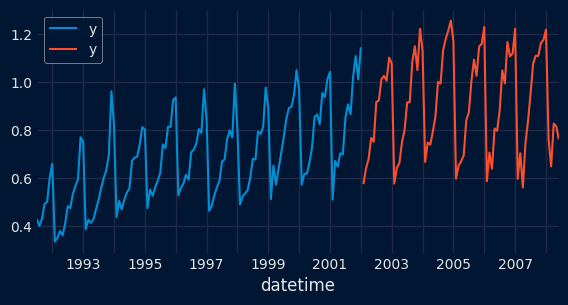

,y
datetime,
1991-07-01,0.429795
1991-08-01,0.400906
1991-09-01,0.432159
1991-10-01,0.492543


In [2]:
# Download data
# ==============================================================================
data = fetch_dataset(
    name="h2o", raw=True, kwargs_read_csv={"names": ["y", "datetime"], "header": 0}
)

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data[['y']]
data = data.sort_index()

# Train-validation dates
# ==============================================================================
end_train = '2002-01-01 23:59:00'

print(
    f"Train dates      : {data.index.min()} --- {data.loc[:end_train].index.max()}"
    f"  (n={len(data.loc[:end_train])})"
)
print(
    f"Validation dates : {data.loc[end_train:].index.min()} --- {data.index.max()}"
    f"  (n={len(data.loc[end_train:])})"
)

# Plot
# ==============================================================================
set_dark_theme()
fig, ax = plt.subplots(figsize=(6, 3))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='validation')
ax.legend()
plt.show()

display(data.head(4))

## TimeSeriesFold

The [`TimeSeriesFold`](../api/model_selection.html#skforecast.model_selection._split.TimeSeriesFold) class is designed to generate the partitions used in the backtesting process to train and evaluate the model. By leveraging its various arguments, it provides extensive flexibility, enabling the simulation of scenarios such as refit, no refit, rolling origin, and others. The `split` method returns the index positions of the time series corresponding to each partition. When `as_pandas=True` is specified, the output is a DataFrame with detailed information, including descriptive column names.

In [3]:
# Create TimeSeriesFold
# ==============================================================================
cv = TimeSeriesFold(
         steps                 = 10,
         initial_train_size    = len(data.loc[:end_train]),
         window_size           = 10,
         refit                 = True,
         fixed_train_size      = False,
         gap                   = 0,
         allow_incomplete_fold = True,
         verbose               = False
     )

cv.split(X=data, as_pandas=True)

,fold,train_start,train_end,last_window_start,last_window_end,test_start,test_end,test_start_with_gap,test_end_with_gap,fit_forecaster
0,0,0,127,117,127,127,137,127,137,True
1,1,0,137,127,137,137,147,137,147,True
2,2,0,147,137,147,147,157,147,157,True
3,3,0,157,147,157,157,167,157,167,True
4,4,0,167,157,167,167,177,167,177,True
5,5,0,177,167,177,177,187,177,187,True
6,6,0,187,177,187,187,197,187,197,True
7,7,0,197,187,197,197,204,197,204,True


It is posible to use a datetime (string compatible with pandas or a pandas Timestamp) as `initial_train_size`. In this case, the initial training set will include all observations up to the specified date (inclusive).

In [4]:
# Create TimeSeriesFold
# ==============================================================================
cv = TimeSeriesFold(
         steps                 = 10,
         initial_train_size    = '2002-01-01 00:00:00',
         window_size           = 10,
         refit                 = True,
         fixed_train_size      = False,
         gap                   = 0,
         allow_incomplete_fold = True,
         verbose               = False
     )

cv.split(X=data, as_pandas=True)

,fold,train_start,train_end,last_window_start,last_window_end,test_start,test_end,test_start_with_gap,test_end_with_gap,fit_forecaster
0,0,0,127,117,127,127,137,127,137,True
1,1,0,137,127,137,137,147,137,147,True
2,2,0,147,137,147,147,157,147,157,True
3,3,0,157,147,157,157,167,157,167,True
4,4,0,167,157,167,167,177,167,177,True
5,5,0,177,167,177,177,187,177,187,True
6,6,0,187,177,187,187,197,187,197,True
7,7,0,197,187,197,197,204,197,204,True


When used in combination with `backtesting_forecaster`, the `window_size` argument doesn't need to be specified. This is because `backtesting_forecaster` automatically sets this value based on the configuration of the forecaster. This ensures that the backtesting process is perfectly tailored to the needs of the forecaster.

## Backtest

An example of a backtesting with refit consists of the following steps:

1. Train the model using an initial training set, the length of which is specified by `initial_train_size`.

2. Once the model is trained, it is used to make predictions for the next 10 steps (`steps=10`) in the data. These predictions are saved for later evaluation.

3. As `refit` is set to `True`, the size of the training set is increased by adding the lats 10 data points (the previously predicted 10 steps), while the next 10 steps are used as test data.

4. After expanding the training set, the model is retrained using the updated training data and then used to predict the next 10 steps.

5. Repeat steps 3 and 4 until the entire series has been tested.

By following these steps, you can ensure that the model is evaluated on multiple sets of test data, thereby providing a more accurate assessment of its predictive power. 

In [5]:
# Backtesting forecaster
# ==============================================================================
forecaster = ForecasterRecursive(
                 regressor       = LGBMRegressor(random_state=123, verbose=-1),
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=[10])
             )

cv = TimeSeriesFold(
        steps                 = 10,
        initial_train_size    = len(data.loc[:end_train]),
        refit                 = True,
        fixed_train_size      = False,
        gap                   = 0,
        allow_incomplete_fold = True
     )

metric, predictions = backtesting_forecaster(
                          forecaster    = forecaster,
                          y             = data['y'],
                          cv            = cv,
                          metric        = 'mean_squared_error',
                          n_jobs        = 'auto',
                          verbose       = True,
                          show_progress = True
                      )

Information of folds
--------------------
Number of observations used for initial training: 127
Number of observations used for backtesting: 77
    Number of folds: 8
    Number skipped folds: 0 
    Number of steps per fold: 10
    Number of steps to exclude between last observed data (last window) and predictions (gap): 0
    Last fold only includes 7 observations.

Fold: 0
    Training:   1991-07-01 00:00:00 -- 2002-01-01 00:00:00  (n=127)
    Validation: 2002-02-01 00:00:00 -- 2002-11-01 00:00:00  (n=10)
Fold: 1
    Training:   1991-07-01 00:00:00 -- 2002-11-01 00:00:00  (n=137)
    Validation: 2002-12-01 00:00:00 -- 2003-09-01 00:00:00  (n=10)
Fold: 2
    Training:   1991-07-01 00:00:00 -- 2003-09-01 00:00:00  (n=147)
    Validation: 2003-10-01 00:00:00 -- 2004-07-01 00:00:00  (n=10)
Fold: 3
    Training:   1991-07-01 00:00:00 -- 2004-07-01 00:00:00  (n=157)
    Validation: 2004-08-01 00:00:00 -- 2005-05-01 00:00:00  (n=10)
Fold: 4
    Training:   1991-07-01 00:00:00 -- 2005-05-01

  0%|          | 0/8 [00:00<?, ?it/s]

In [6]:
# Backtest error and predictions
# ==============================================================================
display(metric)
predictions.head(4)

,mean_squared_error
0,0.008131


,pred
2002-02-01,0.570082
2002-03-01,0.731883
2002-04-01,0.697942
2002-05-01,0.752874


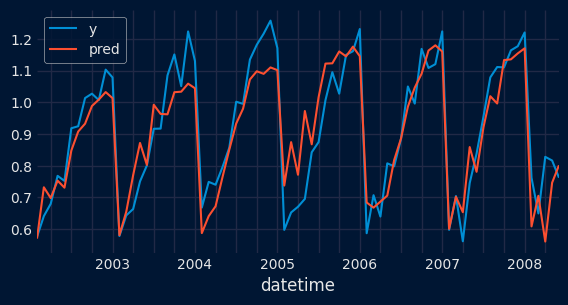

In [7]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data.loc[end_train:, 'y'].plot(ax=ax)
predictions.plot(ax=ax)
ax.legend()
plt.show();

## Backtesting intermittent refit

The same backtesting as above is repeated, but this time with `refit = 3`. The training of the model is done every 3 folds instead of every fold.

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

With an intermittent refit, the model is trained every `refit` * `steps` observations. In this case, 3 * 10 = 30 observations. This can be easily observed in the `verbose` logs.

</div>

In [8]:
# Backtesting with intermittent refit
# ==============================================================================
forecaster = ForecasterRecursive(
                 regressor       = LGBMRegressor(random_state=123, verbose=-1),
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=[10])
             )

cv = TimeSeriesFold(
         steps                 = 10,
         initial_train_size    = len(data.loc[:end_train]),
         refit                 = 3,
         fixed_train_size      = False,
         gap                   = 0,
         allow_incomplete_fold = True
     )

metric, predictions = backtesting_forecaster(
                          forecaster    = forecaster,
                          y             = data['y'],
                          cv            = cv,
                          metric        = 'mean_squared_error',
                          verbose       = True,
                          show_progress = True
                      )

Information of folds
--------------------
Number of observations used for initial training: 127
Number of observations used for backtesting: 77
    Number of folds: 8
    Number skipped folds: 0 
    Number of steps per fold: 10
    Number of steps to exclude between last observed data (last window) and predictions (gap): 0
    Last fold only includes 7 observations.

Fold: 0
    Training:   1991-07-01 00:00:00 -- 2002-01-01 00:00:00  (n=127)
    Validation: 2002-02-01 00:00:00 -- 2002-11-01 00:00:00  (n=10)
Fold: 1
    Training:   No training in this fold
    Validation: 2002-12-01 00:00:00 -- 2003-09-01 00:00:00  (n=10)
Fold: 2
    Training:   No training in this fold
    Validation: 2003-10-01 00:00:00 -- 2004-07-01 00:00:00  (n=10)
Fold: 3
    Training:   1991-07-01 00:00:00 -- 2004-07-01 00:00:00  (n=157)
    Validation: 2004-08-01 00:00:00 -- 2005-05-01 00:00:00  (n=10)
Fold: 4
    Training:   No training in this fold
    Validation: 2005-06-01 00:00:00 -- 2006-03-01 00:00:00  (n

  0%|          | 0/8 [00:00<?, ?it/s]

In [9]:
# Backtest error and predictions
# ==============================================================================
display(metric)
predictions.head(4)

,mean_squared_error
0,0.00863


,pred
2002-02-01,0.570082
2002-03-01,0.731883
2002-04-01,0.697942
2002-05-01,0.752874


## Backtesting with gap

The gap size can be adjusted with the `gap` argument. In addition, the `allow_incomplete_fold` parameter allows the last fold to be excluded from the analysis if it doesn't have the same size as the required number of `steps`.

These arguments can be used in conjunction with either refit set to `True` or `False`, depending on the needs and objectives of the use case.

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

In this example, although only the last 10 predictions (steps) are stored for model evaluation, the total number of predicted steps in each fold is 15 (steps + gap).

</div>

In [10]:
# Backtesting forecaster
# ==============================================================================
forecaster = ForecasterRecursive(
                 regressor       = LGBMRegressor(random_state=123, verbose=-1),
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=[10])
             )

cv = TimeSeriesFold(
         steps                 = 10,
         initial_train_size    = len(data.loc[:end_train]),
         refit                 = True,
         fixed_train_size      = False,
         gap                   = 5,
         allow_incomplete_fold = False
     )

metric, predictions = backtesting_forecaster(
                          forecaster    = forecaster,
                          y             = data['y'],
                          cv            = cv,
                          metric        = 'mean_squared_error',
                          verbose       = True,
                          show_progress = True
                      )

Information of folds
--------------------
Number of observations used for initial training: 127
Number of observations used for backtesting: 77
    Number of folds: 7
    Number skipped folds: 0 
    Number of steps per fold: 10
    Number of steps to exclude between last observed data (last window) and predictions (gap): 5
    Last fold has been excluded because it was incomplete.

Fold: 0
    Training:   1991-07-01 00:00:00 -- 2002-01-01 00:00:00  (n=127)
    Validation: 2002-07-01 00:00:00 -- 2003-04-01 00:00:00  (n=10)
Fold: 1
    Training:   1991-07-01 00:00:00 -- 2002-11-01 00:00:00  (n=137)
    Validation: 2003-05-01 00:00:00 -- 2004-02-01 00:00:00  (n=10)
Fold: 2
    Training:   1991-07-01 00:00:00 -- 2003-09-01 00:00:00  (n=147)
    Validation: 2004-03-01 00:00:00 -- 2004-12-01 00:00:00  (n=10)
Fold: 3
    Training:   1991-07-01 00:00:00 -- 2004-07-01 00:00:00  (n=157)
    Validation: 2005-01-01 00:00:00 -- 2005-10-01 00:00:00  (n=10)
Fold: 4
    Training:   1991-07-01 00:00:0

  0%|          | 0/7 [00:00<?, ?it/s]

In [11]:
# Backtest error and predictions
# ==============================================================================
display(metric)
predictions.head(4)

,mean_squared_error
0,0.009746


,pred
2002-07-01,0.847688
2002-08-01,0.907662
2002-09-01,0.932360
2002-10-01,0.988048


## Backtesting with skip folds

+ If `skip_folds` is an integer, every 'skip_folds'-th is returned. For example, if `skip_folds = 3` and there are 10 folds, the returned folds will be [0, 3, 6, 9].

+ If `skip_folds` is a list, the folds in the list are skipped. If `skip_folds = [1, 2, 3]` and there are 10 folds, the returned folds will be [0, 4, 5, 6, 7, 8, 9].

In [12]:
# Backtesting forecaster with refit and skip folds
# ==============================================================================
forecaster = ForecasterRecursive(
                 regressor       = LGBMRegressor(random_state=123, verbose=-1),
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=[10])
             )

cv = TimeSeriesFold(
         steps                 = 10,
         initial_train_size    = len(data.loc[:end_train]),
         refit                 = True,
         fixed_train_size      = False,
         gap                   = 0,
         skip_folds            = 2,
         allow_incomplete_fold = True
     )

metric, predictions = backtesting_forecaster(
                          forecaster    = forecaster,
                          y             = data['y'],
                          cv            = cv,
                          metric        = 'mean_squared_error',
                          n_jobs        = 'auto',
                          verbose       = True,
                          show_progress = True
                      )

Information of folds
--------------------
Number of observations used for initial training: 127
Number of observations used for backtesting: 77
    Number of folds: 8
    Number skipped folds: 4 [1, 3, 5, 7]
    Number of steps per fold: 10
    Number of steps to exclude between last observed data (last window) and predictions (gap): 0
    Last fold only includes 7 observations.

Fold: 0
    Training:   1991-07-01 00:00:00 -- 2002-01-01 00:00:00  (n=127)
    Validation: 2002-02-01 00:00:00 -- 2002-11-01 00:00:00  (n=10)
Fold: 1
    Fold skipped
Fold: 2
    Training:   1991-07-01 00:00:00 -- 2003-09-01 00:00:00  (n=147)
    Validation: 2003-10-01 00:00:00 -- 2004-07-01 00:00:00  (n=10)
Fold: 3
    Fold skipped
Fold: 4
    Training:   1991-07-01 00:00:00 -- 2005-05-01 00:00:00  (n=167)
    Validation: 2005-06-01 00:00:00 -- 2006-03-01 00:00:00  (n=10)
Fold: 5
    Fold skipped
Fold: 6
    Training:   1991-07-01 00:00:00 -- 2007-01-01 00:00:00  (n=187)
    Validation: 2007-02-01 00:00:00 -

  0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
# Backtest error and predictions
# ==============================================================================
display(metric)
predictions.head(4)

,mean_squared_error
0,0.00537


,pred
2002-02-01,0.570082
2002-03-01,0.731883
2002-04-01,0.697942
2002-05-01,0.752874


## Backtesting with prediction intervals

Backtesting can be used not only to obtain point estimate predictions but also to obtain prediction intervals. Prediction intervals provide a range of values within which the actual values are expected to fall with a certain level of confidence. By estimating prediction intervals during backtesting, one can get a better understanding of the uncertainty associated with your model's predictions. This information can be used to evaluate the reliability of the model's predictions and to make more informed decisions.

To learn more about probabilistic forecasting features available in skforecast, see [Probabilistic forecasting](../user_guides/probabilistic-forecasting-overview.html). 

The `interval` argument can be specified as:

- If `list` or `tuple`: Sequence of percentiles to compute, each value must be between 0 and 100 inclusive. For example, a 95% confidence interval can be specified as `interval = [2.5, 97.5]` or multiple percentiles (e.g. 10, 50 and 90) as `interval = [10, 50, 90]`.

- If `'bootstrapping'` (str): `n_boot` bootstrapping predictions will be generated.

- If `scipy.stats distribution object`, the distribution parameters will be estimated for each prediction.

- If `None`, no probabilistic predictions are estimated.

In [14]:
# Backtesting forecaster with prediction intervals
# ==============================================================================
forecaster = ForecasterRecursive(
                 regressor       = Ridge(random_state=123),
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=[10])
             )

cv = TimeSeriesFold(
         steps                 = 10,
         initial_train_size    = len(data.loc[:end_train]),
         refit                 = True,
         fixed_train_size      = False,
         gap                   = 0,
         skip_folds            = None,
         allow_incomplete_fold = True
     )

metric, predictions = backtesting_forecaster(
                          forecaster              = forecaster,
                          y                       = data['y'],
                          cv                      = cv,
                          metric                  = 'mean_squared_error',
                          interval_method         = 'bootstrapping',
                          interval                = [5, 95],
                          n_boot                  = 150,
                          use_in_sample_residuals = True,
                          verbose                 = False,
                          show_progress           = True
                      )

  0%|          | 0/8 [00:00<?, ?it/s]

In [15]:
# Interval predictions
# ==============================================================================
predictions.head()

,pred,lower_bound,upper_bound
2002-02-01,0.704045,0.517564,0.798605
2002-03-01,0.674050,0.574914,0.781793
2002-04-01,0.698856,0.522447,0.792217
2002-05-01,0.703732,0.532736,0.806036
2002-06-01,0.734222,0.553879,0.825653


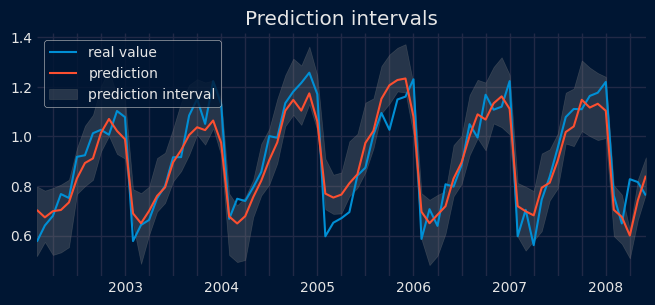

In [16]:
# Plot prediction interval
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
plot_prediction_intervals(
    predictions         = predictions,
    y_true              = data['y'],
    target_variable     = 'y',
    title               = "Prediction intervals",
    kwargs_fill_between = {'color': 'gray', 'alpha': 0.3, 'zorder': 1},
    ax                  = ax
)
ax.legend(loc='upper left');

## Backtesting with exogenous variables

All the backtesting strategies discussed in this document can also be applied when incorporating [exogenous variables](../user_guides/exogenous-variables.html) in the forecasting model.

Exogenous variables are additional independent variables that can impact the value of the target variable being forecasted. These variables can provide valuable information to the model and improve its forecasting accuracy.

In [17]:
# Download data
# ==============================================================================
data = fetch_dataset(name='h2o_exog', raw=False)
data.index.name = 'datetime'

h2o_exog
--------
Monthly expenditure ($AUD) on corticosteroid drugs that the Australian health
system had between 1991 and 2008. Two additional variables (exog_1, exog_2) are
simulated.
Hyndman R (2023). fpp3: Data for Forecasting: Principles and Practice (3rd
Edition). http://pkg.robjhyndman.com/fpp3package/,
https://github.com/robjhyndman/fpp3package, http://OTexts.com/fpp3.
Shape of the dataset: (195, 3)


Train dates      : 1992-04-01 00:00:00 --- 2002-01-01 00:00:00  (n=118)
Validation dates : 2002-02-01 00:00:00 --- 2008-06-01 00:00:00  (n=77)


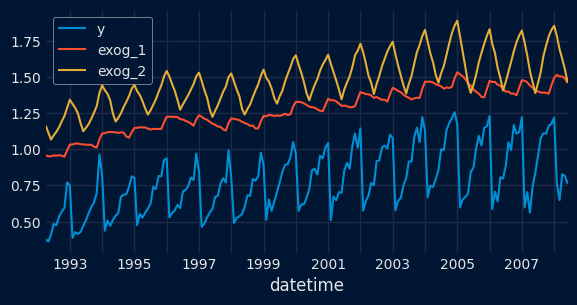

In [18]:
# Train-validation dates
# ==============================================================================
end_train = '2002-01-01 23:59:00'

print(
    f"Train dates      : {data.index.min()} --- {data.loc[:end_train].index.max()}"
    f"  (n={len(data.loc[:end_train])})"
)
print(
    f"Validation dates : {data.loc[end_train:].index.min()} --- {data.index.max()}"
    f"  (n={len(data.loc[end_train:])})"
)

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data.plot(ax=ax);

In [19]:
# Backtest forecaster exogenous variables
# ==============================================================================
forecaster = ForecasterRecursive(
                 regressor       = LGBMRegressor(random_state=123, verbose=-1),
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=[10])
             )

cv = TimeSeriesFold(
         steps                 = 10,
         initial_train_size    = len(data.loc[:end_train]),
         refit                 = True,
         fixed_train_size      = False,
         gap                   = 0,
         skip_folds            = None,
         allow_incomplete_fold = True
     )

metric, predictions = backtesting_forecaster(
                          forecaster = forecaster,
                          y          = data['y'],
                          exog       = data[['exog_1', 'exog_2']],
                          cv         = cv,
                          metric     = 'mean_squared_error'
                      )

  0%|          | 0/8 [00:00<?, ?it/s]

In [20]:
# Backtest error
# ==============================================================================
print("Backtest error with exogenous variables:")
metric

Backtest error with exogenous variables:


,mean_squared_error
0,0.007147


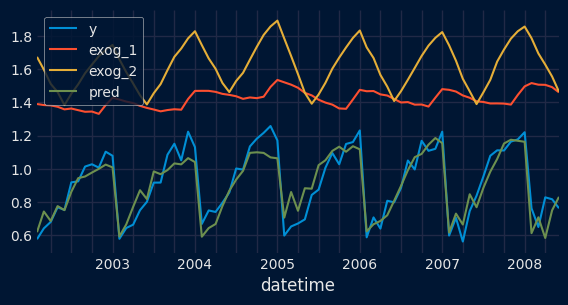

In [21]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data.loc[end_train:].plot(ax=ax)
predictions.plot(ax=ax)
ax.legend(loc="upper left")
plt.show();

## Return predictor's values

In addition to the forecasted values, the backtesting process can also return the predictor values used to generate each prediction. This can be enabled by setting the argument `return_predictors=True`. Also, a `fold` column is added to the returned DataFrame, indicating the fold to which each observation belongs. This allows for a more detailed analysis of the model's performance and the factors that influenced its predictions.

In [22]:
# Create TimeSeriesFold
# ==============================================================================
cv = TimeSeriesFold(
         steps                 = 10,
         initial_train_size    = '2002-01-01 00:00:00',
         window_size           = 10,
         refit                 = True,
         fixed_train_size      = False,
         gap                   = 0,
         allow_incomplete_fold = True,
         verbose               = False
     )

cv.split(X=data, as_pandas=True)

,fold,train_start,train_end,last_window_start,last_window_end,test_start,test_end,test_start_with_gap,test_end_with_gap,fit_forecaster
0,0,0,118,108,118,118,128,118,128,True
1,1,0,128,118,128,128,138,128,138,True
2,2,0,138,128,138,138,148,138,148,True
3,3,0,148,138,148,148,158,148,158,True
4,4,0,158,148,158,158,168,158,168,True
5,5,0,168,158,168,168,178,168,178,True
6,6,0,178,168,178,178,188,178,188,True
7,7,0,188,178,188,188,195,188,195,True


In [23]:
# Return predictors values used in backtesting
# ==============================================================================
metric, predictions = backtesting_forecaster(
                          forecaster        = forecaster,
                          y                 = data['y'],
                          exog              = data[['exog_1', 'exog_2']],
                          cv                = cv,
                          metric            = 'mean_squared_error',
                          return_predictors = True
                      )
predictions.head(4)

  0%|          | 0/8 [00:00<?, ?it/s]

,pred,fold,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,roll_mean_10,exog_1,exog_2
2002-02-01,0.618160,0,1.145868,1.012313,1.109590,1.024293,0.867444,0.907705,0.851926,0.699431,0.704115,0.648470,0.672569,0.510647,1.043805,1.013024,0.938596,0.897115,1.389827,1.673530
2002-03-01,0.742523,0,0.618160,1.145868,1.012313,1.109590,1.024293,0.867444,0.907705,0.851926,0.699431,0.704115,0.648470,0.672569,0.510647,1.043805,1.013024,0.894085,1.383532,1.596904
2002-04-01,0.685457,0,0.742523,0.618160,1.145868,1.012313,1.109590,1.024293,0.867444,0.907705,0.851926,0.699431,0.704115,0.648470,0.672569,0.510647,1.043805,0.897925,1.381575,1.510958
2002-05-01,0.775086,0,0.685457,0.742523,0.618160,1.145868,1.012313,1.109590,1.024293,0.867444,0.907705,0.851926,0.699431,0.704115,0.648470,0.672569,0.510647,0.896528,1.373176,1.462083


## Backtesting with custom metric

In addition to the commonly used metrics such as mean_squared_error, mean_absolute_error, and mean_absolute_percentage_error, users have the flexibility to define their own custom metric function, provided that it includes the arguments `y_true` (the true values of the series) and `y_pred` (the predicted values), and returns a numeric value (either a `float` or an `int`).

This customizability enables users to evaluate the model's predictive performance in a wide range of scenarios, such as considering only certain months, days, non holiday; or focusing only on the last step of the predicted horizon.

To illustrate this, consider the following example: a 12-month horizon is forecasted, but the interest metric is calculated by considering only the last three months of each year. This is achieved by defining a custom metric function that takes into account only the relevant months, which is then passed as an argument to the backtesting function.

In [24]:
# Backtesting with custom metric
# ==============================================================================
def custom_metric(y_true, y_pred):
    """
    Calculate the mean squared error using only the predicted values of the last
    3 months of the year.
    """
    mask = y_true.index.month.isin([10, 11, 12])
    metric = mean_squared_error(y_true[mask], y_pred[mask])
    
    return metric


cv = TimeSeriesFold(
         steps                 = 10,
         initial_train_size    = len(data.loc[:end_train]),
         refit                 = True,
         fixed_train_size      = False,
         gap                   = 0,
         skip_folds            = None,
         allow_incomplete_fold = True
     )

metric, predictions = backtesting_forecaster(
                          forecaster = forecaster,
                          y          = data['y'],
                          cv         = cv,
                          metric     = custom_metric
                      )

metric

  0%|          | 0/8 [00:00<?, ?it/s]

,custom_metric
0,0.007179


## Backtesting with multiple metrics

The `backtesting_forecaster` function provides a convenient way to estimate multiple metrics simultaneously by accepting a list of metrics as an input argument. This list can include any combination of built-in metrics, such as mean_squared_error, mean_absolute_error, and mean_absolute_percentage_error, as well as user-defined custom metrics.

By specifying multiple metrics, users can obtain a more comprehensive evaluation of the model's predictive performance, which can help in selecting the best model for a particular task. Additionally, the ability to include custom metrics allows users to tailor the evaluation to specific use cases and domain-specific requirements.

In [25]:
# Backtesting with multiple metric
# ==============================================================================
multiple_metrics = ['mean_squared_error', 'mean_absolute_error', custom_metric]

cv = TimeSeriesFold(
         steps                 = 10,
         initial_train_size    = len(data.loc[:end_train]),
         refit                 = True,
         fixed_train_size      = False,
         gap                   = 0,
         skip_folds            = None,
         allow_incomplete_fold = True
     )

metrics, predictions = backtesting_forecaster(
                           forecaster = forecaster,
                           y          = data['y'],
                           cv         = cv,
                           metric     = multiple_metrics
                       )

metrics

  0%|          | 0/8 [00:00<?, ?it/s]

,mean_squared_error,mean_absolute_error,custom_metric
0,0.007042,0.067956,0.007179


## Backtesting on training data

While the primary goal of building forecasting models is to predict future values, it is equally important to evaluate if the model is effectively learning from the training data. Analyzing predictions on the training data or exploring the prediction matrices is crucial for assessing model performance and understanding areas for optimization. This process can help identify issues like overfitting or underfitting, as well as provide deeper insights into the model’s decision-making process.

To obtain predictions on the training data,the forecaster must first be fitted using the training dataset. Then, backtesting can be performed using  `backtesting_forecaster` and specifying the arguments `initial_train_size=None` and `refit=False`. This configuration enables backtesting on the same data that was used to train the model.

<div class="admonition note" name="html-admonition" style="background: rgba(0,191,191,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00bfa5; border-color: #00bfa5; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00bfa5;"></i>
    <b style="color: #00bfa5;">&#128161 Tip</b>
</p>

To learn more about how to extract the training and prediction matrices, visit the following link: <a href="../user_guides/training-and-prediction-matrices.html">How to Extract Training and Prediction Matrices</a>.

</div>

In [26]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterRecursive(
                 regressor       = LGBMRegressor(random_state=123, verbose=-1),
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=[10])
             )

forecaster.fit(y=data['y'])

In [27]:
# Backtesting on training data
# ==============================================================================
cv = TimeSeriesFold(
         steps              = 1,
         initial_train_size = None,
         refit              = False
     )

metric, predictions_training = backtesting_forecaster(
                                   forecaster = forecaster,
                                   y          = data['y'],
                                   cv         = cv,
                                   metric     = 'mean_squared_error'
                               )

metric

  0%|          | 0/180 [00:00<?, ?it/s]

,mean_squared_error
0,0.000709


In [28]:
# Training predictions
# ==============================================================================
predictions_training.head(4)

,pred
1993-07-01,0.525134
1993-08-01,0.569934
1993-09-01,0.601695
1993-10-01,0.641750


It is important to note that the first 15 observations are excluded from the predictions since they are required to generate the lags that serve as predictors in the model. 

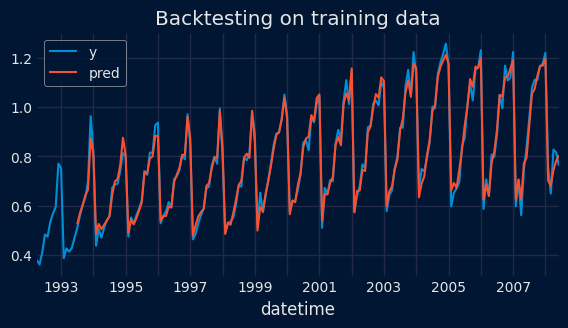

In [29]:
# Plot training predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data['y'].plot(ax=ax)
predictions_training.plot(ax=ax)
ax.set_title("Backtesting on training data")
ax.legend()
plt.show();